## Homework 1：PM 2.5 Prediction

###### 本次作業的資料是從中央氣象局網站下載的真實觀測資料，大家必須利用 linear regression 或其他方法預測 PM2.5 的數值。觀測記錄被分成 train set 跟 test set，前者是每個月的前 20 天所有資料；後者則是從剩下的資料中隨機取樣出來的。
###### train.csv: 每個月前 20 天的完整資料。
###### test.csv: 從剩下的 10 天資料中取出 240 筆資料。每一筆資料都有連續 9 小時的觀測數據，兒童學必須以此預測第十小時的 PM2.5。

In [65]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
import math

In [104]:
train_data = pd.read_csv(r'C:\Users\racco\Documents\DataScience\李宏毅 machine learning\作業\datasets\hw1\train.csv', 
                    encoding = 'big5hkscs')
print(train_data.shape) # no missing data
train_data.head(3)

(4320, 27)


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32


In [94]:
item_list = train_data['測項'].unique().tolist()

In [95]:
date_list = train_data.日期.unique().tolist()
new_date = []
for values in date_list:
    for j in range(1, 25):
        name = values + '_' + str(j)
        new_date.append(name)

In [99]:
pm_frame = pd.DataFrame(columns = ['Time'])
pm_frame['Time'] = new_date
for i in range(18):
    if item_list[i] != 'RAINFALL':
        all_item = train_data[train_data['測項'] == item_list[i]].iloc[:, 3:].astype('float')
        item = np.array(all_item).flatten()
        pm_frame[item_list[i]] = item

In [100]:
print(pm_frame.shape)
pm_frame.drop('Time', axis = 1).corr()
# |Correlation| < 0.1: AMB_TEMP, WIND_SPEED, WS_HR

(5760, 18)


,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
AMB_TEMP,1.000000,-0.409298,-0.002863,0.082424,-0.023659,-0.129846,-0.113840,0.224788,0.084691,-0.017127,-0.225710,0.287746,-0.223133,0.360292,0.339646,0.280409,0.369668
CH4,-0.409298,1.000000,0.126959,0.196183,0.101720,0.298684,0.274580,0.014692,0.220376,0.254657,-0.001729,0.021025,0.776974,-0.068098,-0.081634,-0.221642,-0.258649
CO,-0.002863,0.126959,1.000000,0.459006,0.256951,0.401150,0.405052,0.077529,0.274418,0.283119,-0.089177,0.364416,0.349852,0.079935,0.081239,0.004908,0.044476
NMHC,0.082424,0.196183,0.459006,1.000000,0.445830,0.673149,0.683953,-0.046030,0.336524,0.291778,-0.056915,0.321194,0.709745,0.189240,0.174706,-0.064140,-0.023633
NO,-0.023659,0.101720,0.256951,0.445830,1.000000,0.491352,0.703006,-0.232499,0.048311,0.029970,0.012208,0.256549,0.324725,0.151808,0.142942,-0.074728,-0.074452
NO2,-0.129846,0.298684,0.401150,0.673149,0.491352,1.000000,0.963312,-0.101601,0.464207,0.449113,-0.000337,0.427541,0.591057,0.218270,0.187914,-0.289601,-0.261985
NOx,-0.113840,0.274580,0.405052,0.683953,0.703006,0.963312,1.000000,-0.152602,0.393517,0.375564,0.003386,0.426321,0.580241,0.224233,0.197045,-0.259386,-0.237106
O3,0.224788,0.014692,0.077529,-0.046030,-0.232499,-0.101601,-0.152602,1.000000,0.370415,0.356670,-0.670286,0.180083,-0.008989,0.277488,0.271440,0.300232,0.171200
PM10,0.084691,0.220376,0.274418,0.336524,0.048311,0.464207,0.393517,0.370415,1.000000,0.776426,-0.310882,0.401285,0.356804,0.228486,0.190368,-0.016560,0.006748
PM2.5,-0.017127,0.254657,0.283119,0.291778,0.029970,0.449113,0.375564,0.356670,0.776426,1.000000,-0.264196,0.370831,0.352159,0.186138,0.156990,-0.084703,-0.045458


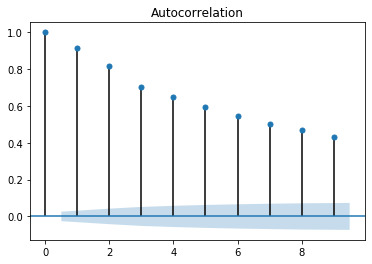

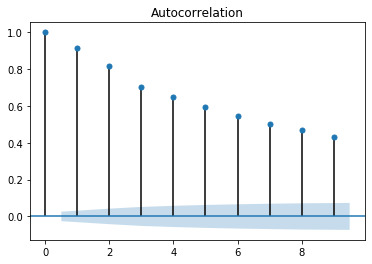

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pm, lags = 9)

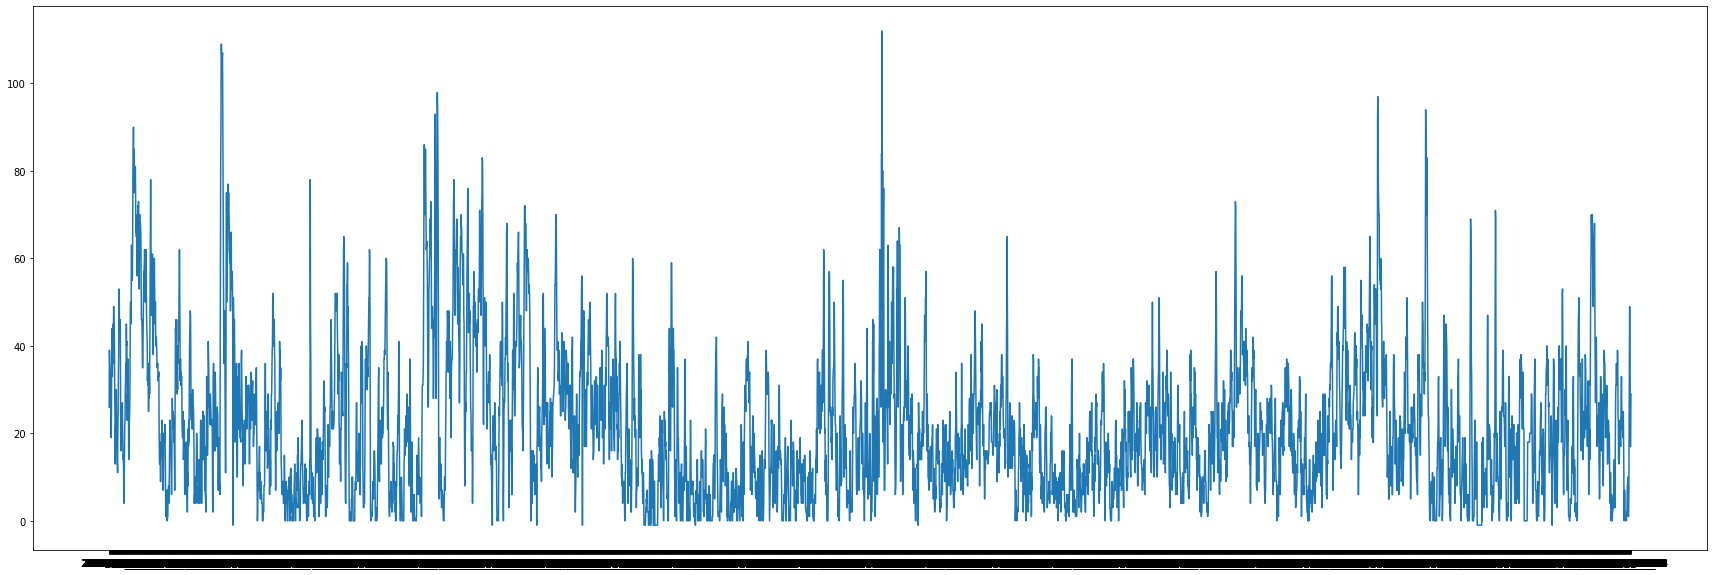

In [137]:
plt.figure(figsize = (30,10))
plt.plot(new_date, pm)

In [5]:
head_month = [0, 480, 960, 1440, 1920, 2400, 2880, 3360, 3840, 4320, 4800, 5280]
sub_date = []
for k in head_month:
    sub_date += list(range(k, k+20))

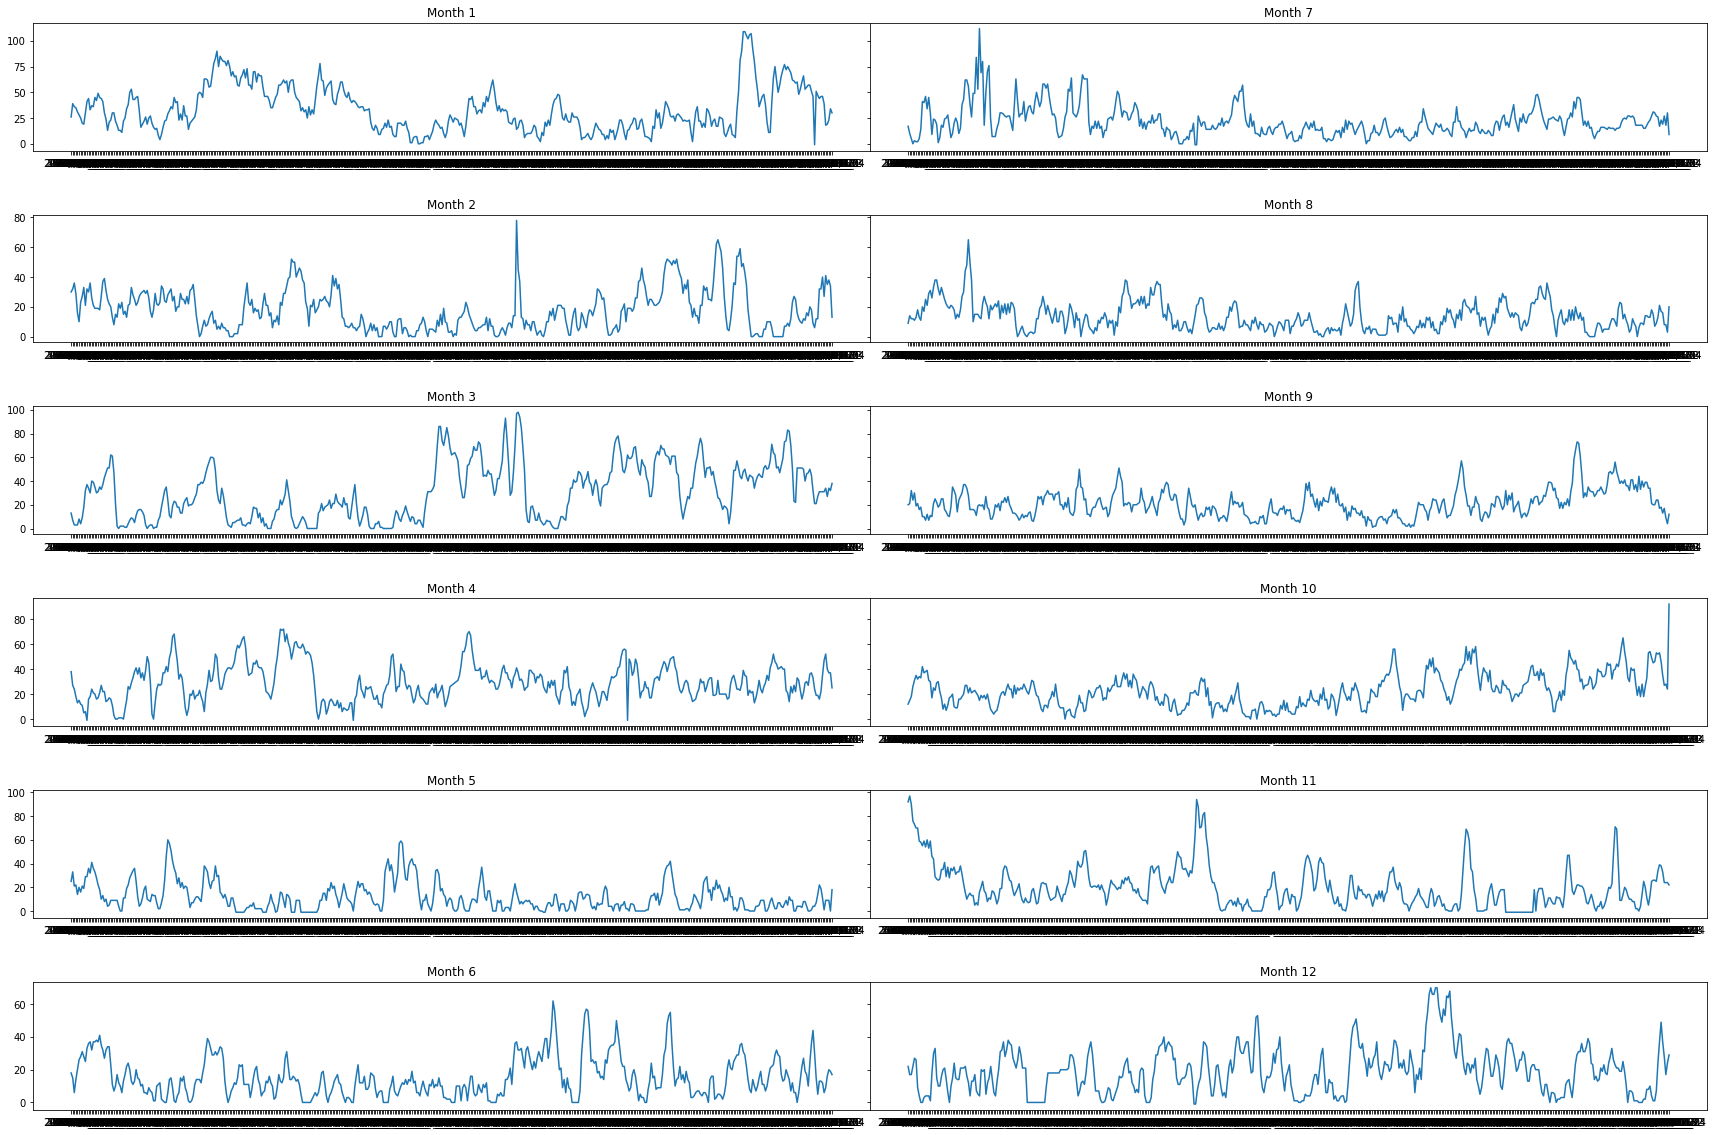

In [29]:
fig, axs = plt.subplots(6, 2, sharey = 'row', figsize = (30, 20), 
                        gridspec_kw = {'hspace': 0.5, 'wspace': 0})
for k in head_month:
    if k <= 2400:
        axs[head_month.index(k), 0].plot(pm_frame.loc[k:k+480, 'Time'], 
                 pm_frame.loc[k:k+480, 'PM2.5'])
        axs[head_month.index(k), 0].set_title("Month " + str(head_month.index(k) + 1))
    else:
        axs[head_month.index(k)-6, 1].plot(pm_frame.loc[k:k+480, 'Time'], 
                 pm_frame.loc[k:k+480, 'PM2.5'])
        axs[head_month.index(k)-6, 1].set_title("Month " + str(head_month.index(k) + 1))

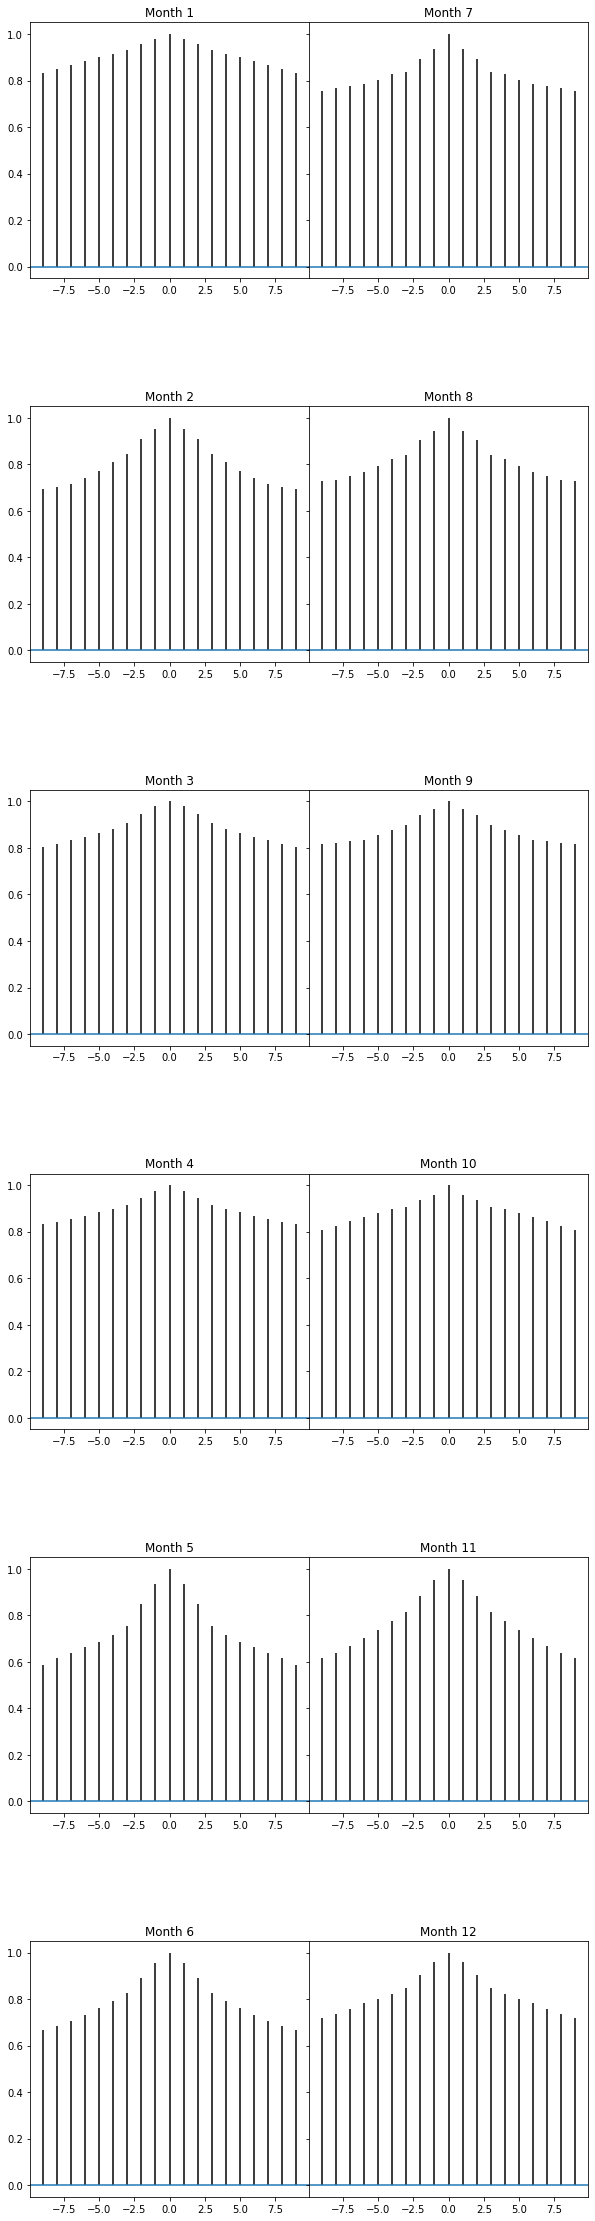

In [32]:
fig, axs = plt.subplots(6, 2, sharey = 'row', figsize = (10, 40), 
                        gridspec_kw = {'hspace': 0.5, 'wspace': 0})
for k in head_month:
    if k <= 2400:
        axs[head_month.index(k), 0].acorr(pm_frame.loc[k:k+480, 'PM2.5'], maxlags = 9)
        axs[head_month.index(k), 0].set_title("Month " + str(head_month.index(k) + 1))
    else:
        axs[head_month.index(k)-6, 1].acorr(pm_frame.loc[k:k+480, 'PM2.5'], maxlags = 9)
        axs[head_month.index(k)-6, 1].set_title("Month " + str(head_month.index(k) + 1))

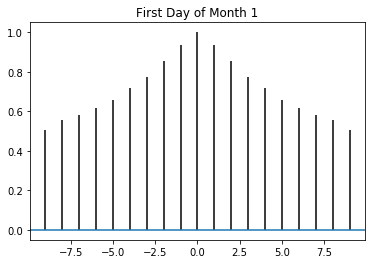

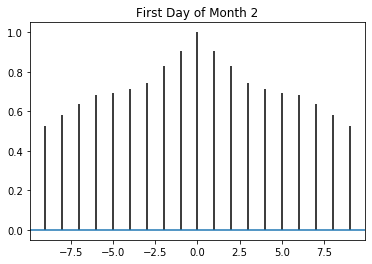

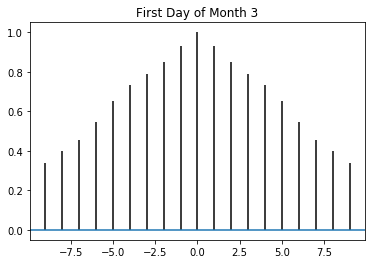

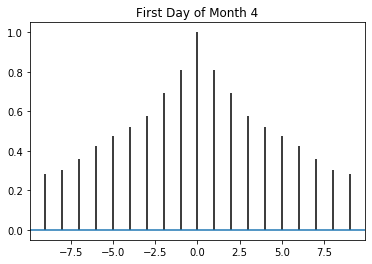

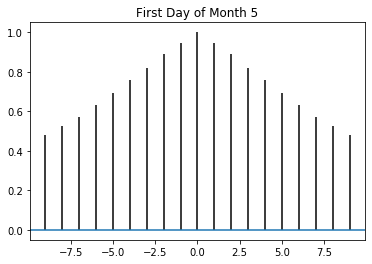

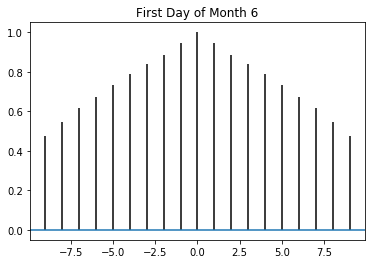

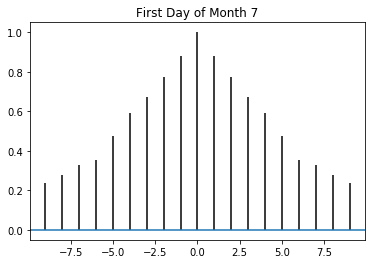

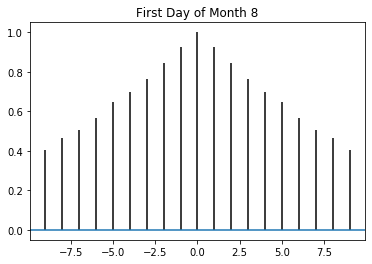

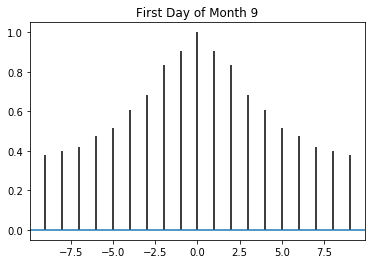

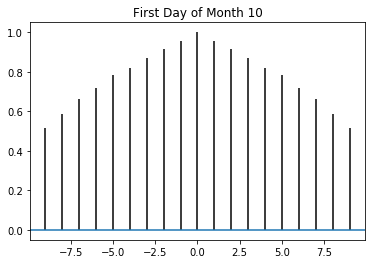

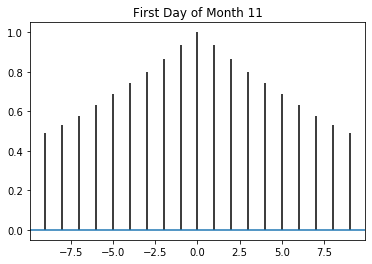

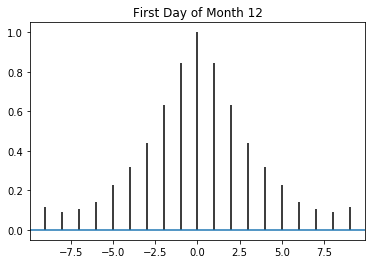

In [11]:
month_heads = pm_frame.iloc[sub_date, :]
for k in head_month:
    #plt.plot(month_heads.loc[k:k+20, 'Time'], 
             #month_heads.loc[k:k+20, 'PM2.5'])
    plt.acorr(month_heads.loc[k:k+20, 'PM2.5'], maxlags = 9)
    plt.title("First Day of Month " + str(head_month.index(k) + 1))
    plt.show()

### Preprocess & Transpose to pivot-like

In [105]:
def feature_dataset(df, item_col, start, features, removal):
    new_df = df[df[item_col] != removal]
    train = new_df.iloc[:, start:]
    raw_train = train.to_numpy()
    month_data = {}
    for month in range(12):
        sample = np.empty([features, 480])
        for day in range(20):
            sample[:, day*24 : (day+1)*24] = raw_train[features*(20*month + day) : features*(20*month + day + 1), :]
        month_data[month] = sample
    return month_data

def create_xy(month_df, features = 0):
    x = np.empty([12 * 471, features * 9], dtype = float)
    y = np.empty([12 * 471, 1], dtype = float)
    for month in range(12):
        for day in  range(20):
            for hour in range(24):
                if day == 19 and hour > 14:
                    continue
                x[month * 471 + day * 24 + hour, :] = month_df[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1, -1) #vector dim:18*9 (9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9)
                y[month * 471 + day * 24 + hour, 0] = month_df[month][9, day * 24 + hour + 9]
    return x, y

def normalize_xy(x):
    mean_x = np.mean(x, axis = 0) # features * 9 
    std_x = np.std(x, axis = 0) # features * 9 
    for i in range(len(x)): # 12 * 471
        for j in range(len(x[0])): #18 * 9 
            if std_x[j] != 0:
                x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]
    return mean_x, std_x, x

def create_train_valid(x, y, proportion = 0.8):
    x_train_set = x[: math.floor(len(x) * proportion), :]
    y_train_set = y[: math.floor(len(y) * proportion), :]
    x_validation = x[math.floor(len(x) * proportion): , :]
    y_validation = y[math.floor(len(y) * proportion): , :]
    print(len(x_train_set))
    print(len(y_train_set))
    print(len(x_validation))
    print(len(y_validation))
    return x_train_set, y_train_set, x_validation, y_validation

def adagradient_iters(iters, learning_rate, features, x, y, eps):
    dim = features * 9 + 1
    weight = np.zeros([dim, 1])
    x = np.concatenate((np.ones([12 * 471, 1]), x), axis = 1).astype(float)
    adagrad = np.zeros([dim, 1])
    for t in range(iters):
        loss = np.sqrt(np.sum(np.power(np.dot(x, weight) - y, 2))/471/12)#rmse
        if(t%100==0):
            clear_output(wait = True)
            print(str(t) + ":" + str(loss))
        gradient = 2 * np.dot(x.transpose(), np.dot(x, weight) - y) #dim*1
        adagrad += gradient ** 2
        weight = weight - learning_rate * gradient / np.sqrt(adagrad + eps)
    np.save('weight.npy', weight)
    return weight, x, y, loss

def test_result(test_df):
    w = np.load('weight.npy')
    ans_y = np.dot(test_df, w)
    with open('submit.csv', mode='w', newline='') as submit_file:
        csv_writer = csv.writer(submit_file)
        header = ['id', 'value']
        print(header)
        csv_writer.writerow(header)
        for i in range(240):
            row = ['id_' + str(i), ans_y[i][0]]
            csv_writer.writerow(row)
            print(row)
    return ans_y

In [107]:
new_train = feature_dataset(train_data, '測項', 3, 14, (('RAINFALL') or ('AMB_TEMP') or ('WIND_SPEED') or ('WS_HR')))
x_train, y_train = create_xy(new_train, 14)
mean_x, std_x, xtrain_norm = normalize_xy(x_train)
mean_y, std_y, ytrain_norm = normalize_xy(y_train)
x_train_norm, y_train_norm, x_validation_norm, y_validation_norm = create_train_valid(xtrain_norm, ytrain_norm)

4521
4521
1131
1131


In [109]:
weight, x, y, loss = adagradient_iters(10000, 100, 14, xtrain_norm, ytrain_norm, 0.0000000001)

9900:0.4817132406657541


In [120]:
weight

array([[ 3.05151501e-15],
       [-6.05171804e-03],
       [-1.21021073e-03],
       [ 1.72005567e-05],
       [ 2.57322205e-03],
       [-3.61197474e-03],
       [-1.99715139e-03],
       [-6.67712747e-03],
       [ 2.92788647e-03],
       [-6.56931165e-03],
       [ 5.19270007e-03],
       [-5.38299843e-03],
       [-3.48173639e-03],
       [ 7.41880532e-04],
       [ 8.36284279e-03],
       [ 1.65364282e-03],
       [-1.53477305e-03],
       [ 2.44909355e-03],
       [-9.54773040e-03],
       [-1.63173866e-02],
       [ 7.75132267e-04],
       [-2.57243979e-04],
       [ 1.48128688e-03],
       [-7.02148615e-05],
       [ 2.39354297e-03],
       [-4.19823151e-03],
       [ 7.68191140e-03],
       [-1.26350450e-02],
       [ 1.84577372e-02],
       [-6.62876050e-03],
       [-2.95970978e-03],
       [-3.07468512e-03],
       [-1.00236407e-02],
       [-9.44229760e-03],
       [-8.14733353e-03],
       [-1.92403421e-04],
       [ 1.15334448e-02],
       [-5.30024107e-03],
       [-1.5

In [111]:
test_data = pd.read_csv(r'C:\Users\racco\Documents\DataScience\李宏毅 machine learning\作業\datasets\hw1\test.csv', 
                    encoding = 'big5hkscs', header = None)
print(test_data.shape) # no missing data
test_data = test_data.rename(columns = {test_data.columns[1]: '測項'})
test_data = test_data[test_data['測項'] != (('RAINFALL') or ('AMB_TEMP') or ('WIND_SPEED') or ('WS_HR'))]
test_data = test_data.iloc[:, 2:]
test_data = test_data.to_numpy()

features = 14
test_x = np.empty([240, features*9], dtype = float)
for i in range(240):
    test_x[i, :] = test_data[features * i: features* (i + 1), :].reshape(1, -1)
for i in range(len(test_x)):
    for j in range(len(test_x[0])):
        if std_x[j] != 0:
            test_x[i][j] = (test_x[i][j] - mean_x[j]) / std_x[j]
test_x = np.concatenate((np.ones([240, 1]), test_x), axis = 1).astype(float)
test_x

(4320, 11)


array([[ 1.00000000e+00, -1.91110110e-01, -1.91294015e-01, ...,
         7.43954907e-01,  7.89988219e-01,  1.14558290e+00],
       [ 1.00000000e+00,  4.02159534e-01,  1.87308951e-01, ...,
         7.43954907e-01,  6.60286115e-01,  6.43203412e-01],
       [ 1.00000000e+00, -5.04224643e-01, -5.04052987e-01, ...,
         6.78976919e-01, -4.43716819e-03, -1.18468711e-01],
       ...,
       [ 1.00000000e+00, -5.34382517e-01, -5.34670444e-01, ...,
        -5.21491407e-01, -5.24866861e-01, -5.28475194e-01],
       [ 1.00000000e+00, -5.92724110e-02, -7.60670255e-02, ...,
         1.24753431e+00,  1.22773282e+00,  1.30764080e+00],
       [ 1.00000000e+00,  4.84558095e-01,  4.77992753e+00, ...,
         3.70331477e-01,  3.19818092e-01,  2.86676036e-01]])

In [118]:
w = weight # np.load('weight.npy')
ans_y = np.dot(test_x, w)
#ans_y = ans_y*std_y + mean_y

In [121]:
import csv
with open('submit.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['id', 'value']
    print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), ans_y[i][0]]
        csv_writer.writerow(row)
        print(row)

['id', 'value']
['id_0', -0.25236317610827164]
['id_1', -0.331726676420277]
['id_2', -0.4869838145001232]
['id_3', -0.12210520850349466]
['id_4', 1.3048621548191486]
['id_5', -0.5361467552705228]
['id_6', 0.23061021248357727]
['id_7', -0.2497658407031601]
['id_8', -0.474441057226034]
['id_9', -0.010876736490643357]
['id_10', 3.7306749299363933]
['id_11', 0.3839947908476399]
['id_12', -0.12259955646207785]
['id_13', -0.5438468785323749]
['id_14', -0.5214449032567621]
['id_15', -0.5301962523879806]
['id_16', -0.8043983505234286]
['id_17', -0.0760179915086673]
['id_18', -0.5007589122168961]
['id_19', -0.47779542354207655]
['id_20', -0.11484542443238605]
['id_21', 4.166177517052787]
['id_22', -0.37965481284363406]
['id_23', -0.09095389960739596]
['id_24', -0.31214923269548656]
['id_25', -0.5012643994980633]
['id_26', -0.18119130672011452]
['id_27', 1.8447539228610053]
['id_28', 0.46063450638374637]
['id_29', -0.0076085839080815496]
['id_30', -0.53660047415165]
['id_31', -0.5366882868004824